In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Fisher_CMB import *
from Models.SPT3G.spt3G_model import spt3G_model
from Models.Planck.Planck_model import planck_model
from pickle import load
from Models.COVS.create_basic_cov import *

In [16]:
params={'H0':72.5,#'cosmomc_theta': 1.0429e-2,
                           'ombh2':0.0223,
                           'omch2':0.1093,
                           'tau':0.083,
                           'As':2.142e-09,#*exp(2*0.068),
                           'ns':0.9623,
                           'lmax':6000,
                           'lens_potential_accuracy':2.0}

In [12]:

create_basic_cov(.65,.0015,"Models/COVS/planck_cov_ell_2_5000.p",
                     noise=(62,'uks'),
                     time= 3.7e7,
                     windowrange = slice(2,5000),
                     bin_size = 24,
                     spectra=('TT','EE','TE'),
                     )

In [3]:
scov=load(open( "Models/COVS/spt3G_cov_ell_200_5000.p", "rb" ))
pcov_ell_2_5000=load(open( "Models/COVS/planck_cov_ell_2_5000.p", "rb" ))
pcov_ell_2_800=load(open( "Models/COVS/planck_cov_ell_2_800.p", "rb" ))

<IPython.core.display.Javascript object>


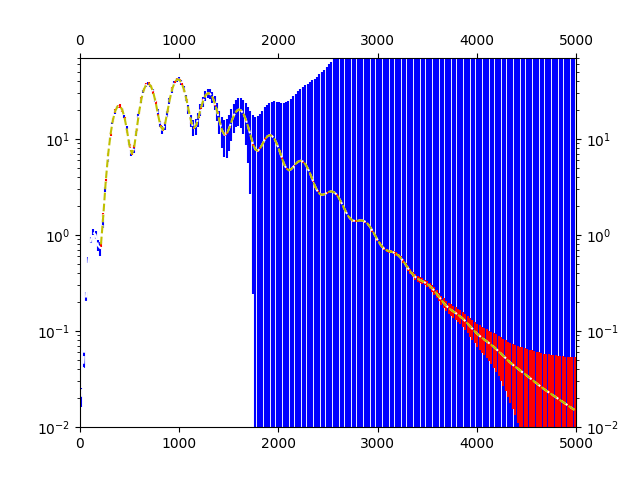

(0, 5000)

In [6]:


ms=spt3G_model(specrange = [('TT',slice(200,3000)),
                                ('EE',slice(200,5000)),
                                ('TE',slice(200,5000))])
mp=planck_model(specrange = [('TT',slice(2,3000)),
                                ('EE',slice(2,5000)),
                                ('TE',slice(2,5000))])
cmbs=ms(**params)[200:200*2]
cmbp=mp(**params)[208:208*2]
errorbar(dot(mp.windows['EE'],range(5000)[mp.windowrange['EE']]),cmbp,yerr=sqrt(diag(pcov['EEEE'])),fmt='--',color='w',ecolor='b')
errorbar(dot(ms.windows['EE'],range(5000)[ms.windowrange['EE']]),cmbs,yerr=sqrt(diag(scov['EEEE'])),fmt='--',color='y',ecolor='r')
yscale("log", nonposy='clip')
tick_params(which='both',top=True,right=True,labeltop=True,labelright=True)
ylim(0.01,70)
yticks([.01,.1,1,10])

xlim(0,5000)

In [84]:
params={'H0':None,'cosmomc_theta': fish_param(1.0438e-2,1.3e-5),
                           'ombh2':fish_param(0.0223,0.001),
                           'ommh2':fish_param(0.13,0.007),
                           'tau':fish_param(0.083,0.02, 0.02),
                           'clamp':fish_param(1.93e-09,4.5e-11),
                           'ns':fish_param(0.9623,0.032),
                           #'mnu':fish_param(.06,0.01),
                           'nnu':fish_param(3.046,0.03),
                           'YHe':fish_param(.252,.014),
                           #'Asz':fish_param(5.5,3.0,3.0),
                           #'Aps':fish_param(19.3,3.5,3.5),
                           #'Acib':fish_param(5.,2.5,2.5),
                           #'Tcal':fish_param(1.0087,.0015,.0015),
                           #'Pcal':fish_param(1,0.01,.01),
                           #'A_TE80':fish_param(1.5,.5),
                           #'A_EE80':fish_param(1.5,.5),
                           #'a_TE':fish_param(-2.42,.02,.02),
                           #'a_EE':fish_param(-2.42,.02,.02),
                           #'D_PSEE_3000': fish_param(2.,.5),
                           'lmax':6000,'lens_potential_accuracy':2.0}

In [85]:
Fp=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],pcov_ell_2_5000),
                 planck_model(specrange = [('TT',slice(2,3000)),('EE',slice(2,5000)),('TE',slice(2,5000))]))

0 YHe 0.0185658463929
1 clamp 1.95378336385e-11
2 cosmomc_theta 1.37192724005e-05
3 nnu 0.365026921739
4 ns 0.0100025822379
5 ombh2 0.000255095030056
6 ommh2 0.00499349487364
7 tau 0.00776395509978


In [86]:
Fs=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],scov),spt3G_model(specrange = [('TT',slice(200,3000)),
                                ('EE',slice(200,5000)),
                                ('TE',slice(200,5000))]))

0 YHe 0.0148310958504
1 clamp 1.81613691335e-11
2 cosmomc_theta 8.60390812217e-06
3 nnu 0.295441595467
4 ns 0.0118220908411
5 ombh2 0.000120981027217
6 ommh2 0.0042402704655
7 tau 0.0154522552636


In [87]:
Fps = Fp[0]+Fs[0]

In [88]:
def contour_range(mean,std,nsig=4,points=100):
    return linspace(mean-nsig*std,mean+nsig*std,points)

In [89]:
def sig_contours(mu,sigma,colors='k'):
    x=contour_range(mu[0],sqrt(sigma[0,0]))
    y=contour_range(mu[1],sqrt(sigma[1,1]))
    X,Y=meshgrid(x,y)
    Z = bivariate_normal(X, Y, sigmax=sqrt(sigma[0,0]), sigmay=sqrt(sigma[1,1]),
                      mux=mu[0], muy=mu[1],sigmaxy=sigma[0,1])
    z1 = bivariate_normal(mu[0]+sqrt(sigma[0,0])*1, mu[1], sigmax=sqrt(sigma[0,0]), sigmay=sqrt(sigma[1,1]),
                      mux=mu[0], muy=mu[1],sigmaxy=sigma[0,1])
    z2 = bivariate_normal(mu[0]+sqrt(sigma[0,0])*2, mu[1], sigmax=sqrt(sigma[0,0]), sigmay=sqrt(sigma[1,1]),
                      mux=mu[0], muy=mu[1],sigmaxy=sigma[0,1])
        
    return contour(Y, X, Z,[z2,z1],colors=colors)
        


<IPython.core.display.Javascript object>


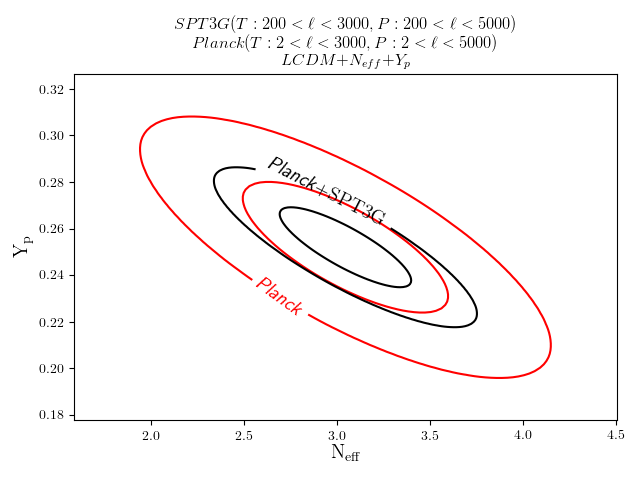

In [91]:
mean = [.252,3.046]
sigmap = array([[inv(Fp[0])[0,0],inv(Fp[0])[0,3]],[inv(Fp[0])[3,0],inv(Fp[0])[3,3]]])
sigmaps = array([[inv(Fps)[0,0],inv(Fps)[0,3]],[inv(Fps)[3,0],inv(Fps)[3,3]]])
xlab = r'$\rm{N}_{\rm{eff}}$'
ylab = r'$\rm{Y}_{\rm{p}}$'
titl='$SPT3G(T:200<\ell<3000,P:200<\ell<5000)$'+ \
'\n $Planck(T:2<\ell<3000,P:2<\ell<5000)$'+ \
'\n $LCDM$+$N_{eff}$+$Y_p$'

matplotlib.rc('text', usetex = True)
figure()
cs2=sig_contours(mean,sigmap,colors = 'r')
cs1=sig_contours(mean,sigmaps,colors = 'k')
fmt1=dict(zip(cs1.levels,[r'$\textit{Planck}$+$\rm{SPT3G}$',r'$\textit{Planck}$+$\rm{SPT3G}$']))
fmt2=dict(zip(cs2.levels,[r'$\textit{Planck}$',r'$\textit{Planck}$']))

clabel(cs2,cs2.levels[::2], inline=True, fmt=fmt2, fontsize=14)
clabel(cs1,cs1.levels[::2], inline=True, fmt=fmt1, fontsize=14)
xlabel(xlab, fontsize=14)
ylabel(ylab, fontsize=14)
title(titl)
tight_layout()
savefig('Figures/Yp_Neff_constraints_planck_and_planckSPT3G.pdf')

In [4]:
params={'H0':fish_param(72.5,2),#'cosmomc_theta': fish_param(1.0438e-2,1.3e-5),
                           'ombh2':fish_param(0.0223,0.001),
                           'ommh2':fish_param(0.13,0.007),
                           'tau':fish_param(0.083,0.02, 0.02),
                           'clamp':fish_param(1.93e-09,4.5e-11),
                           'ns':fish_param(0.9623,0.032),
                           'nnu':fish_param(3.046,0.03),
                           
                           'lmax':6000,'lens_potential_accuracy':2.0}

In [5]:
Fp_5000_h0_neff=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],pcov_ell_2_5000),planck_model(specrange = [('TT',slice(2,3000)),
                                ('EE',slice(2,5000)),
                                ('TE',slice(2,5000))]))

0 H0 1.71432082834
1 clamp 1.64516965014e-11
2 nnu 0.195519953274
3 ns 0.0097464844821
4 ombh2 0.000251894041764
5 ommh2 0.00283388936384
6 tau 0.00771402615748


In [6]:
Fp_800_h0_neff=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],pcov_ell_2_800),planck_model(specrange = [('TT',slice(2,800)),
                                ('EE',slice(2,800)),
                                ('TE',slice(2,800))]))

0 H0 2.55578126766
1 clamp 3.01967962757e-11
2 nnu 0.367471988017
3 ns 0.0130697402397
4 ombh2 0.000352450312741
5 ommh2 0.00566529026863
6 tau 0.00780084349466


In [7]:
Fs_h0_neff=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],scov),spt3G_model(specrange = [('TT',slice(200,3000)),
                                ('EE',slice(200,5000)),
                                ('TE',slice(200,5000))]))

0 H0 1.1659224618
1 clamp 1.44477582345e-11
2 nnu 0.125759173143
3 ns 0.0114198821713
4 ombh2 0.000118055866725
5 ommh2 0.00251840902681
6 tau 0.0152412470917


In [9]:
Fps_5000_h0_neff = Fp_5000_h0_neff[0]+Fs_h0_neff[0]
Fps_800_5000_h0_neff = Fp_800_h0_neff[0]+Fs_h0_neff[0]

In [10]:
params={'H0':fish_param(72.5,2),#'cosmomc_theta': fish_param(1.0438e-2,1.3e-5),
                           'ombh2':fish_param(0.0223,0.001),
                           'ommh2':fish_param(0.13,0.007),
                           'tau':fish_param(0.083,0.02, 0.02),
                           'clamp':fish_param(1.93e-09,4.5e-11),
                           'ns':fish_param(0.9623,0.032),
                           #'nnu':fish_param(3.046,0.03),
                           
                           'lmax':6000,'lens_potential_accuracy':2.0}

In [11]:
Fp_5000_h0=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],pcov_ell_2_5000),planck_model(specrange = [('TT',slice(2,3000)),
                                ('EE',slice(2,5000)),
                                ('TE',slice(2,5000))]))

0 H0 0.723694776532
1 clamp 7.76209040228e-12
2 ns 0.0043023405812
3 ombh2 0.00015648627793
4 ommh2 0.00136006283705
5 tau 0.00744641480203


In [13]:
Fp_800_h0=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],pcov_ell_2_800),planck_model(specrange = [('TT',slice(2,800)),
                                ('EE',slice(2,800)),
                                ('TE',slice(2,800))]))

0 H0 1.15575907676
1 clamp 9.5484268861e-12
2 ns 0.00854666818472
3 ombh2 0.000282635225722
4 ommh2 0.0017903179795
5 tau 0.00773503355471


In [14]:
Fs_h0=Fisher_Matrix(params,make_full_cov(['TT','EE','TE'],scov),spt3G_model(specrange = [('TT',slice(200,3000)),
                                ('EE',slice(200,5000)),
                                ('TE',slice(200,5000))]))


0 H0 0.75998206191
1 clamp 1.31634237153e-11
2 ns 0.00677261952209
3 ombh2 8.83161171167e-05
4 ommh2 0.00176356711024
5 tau 0.0147631652319


In [15]:
Fps_5000_h0 = Fp_5000_h0[0]+Fs_h0[0]
Fps_800_5000_h0 = Fp_800_h0[0]+Fs_h0[0]

<IPython.core.display.Javascript object>


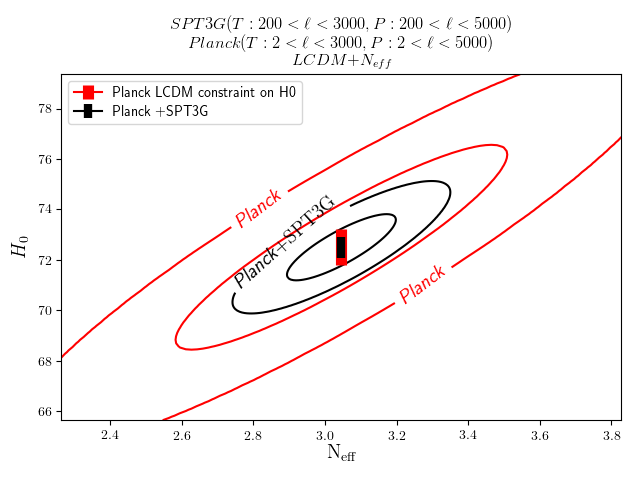

In [79]:
mean = [72.5,3.046]
sigmap = array([[inv(Fp_5000_h0_neff[0])[0,0],inv(Fp_5000_h0_neff[0])[0,2]],[inv(Fp_5000_h0_neff[0])[2,0],
                                                                    inv(Fp_5000_h0_neff[0])[2,2]]])
sigmaps = array([[inv(Fps_5000_h0_neff)[0,0],inv(Fps_5000_h0_neff)[0,2]],[inv(Fps_5000_h0_neff)[2,0],
                                                                inv(Fps_5000_h0_neff)[2,2]]])


xlab = r'$\rm{N}_{\rm{eff}}$'
ylab = r'$H_0$'
titl='$SPT3G(T:200<\ell<3000,P:200<\ell<5000)$'+ \
'\n $Planck(T:2<\ell<3000,P:2<\ell<5000)$'+ \
'\n $LCDM$+$N_{eff}$'

matplotlib.rc('text', usetex = True)
figure()
cs2=sig_contours(mean,sigmap,colors = 'r')
cs1=sig_contours(mean,sigmaps,colors = 'k')

fmt1=dict(zip(cs1.levels,[r'$\textit{Planck}$+$\rm{SPT3G}$',r'$\textit{Planck}$+$\rm{SPT3G}$']))
fmt2=dict(zip(cs2.levels,[r'$\textit{Planck}$',r'$\textit{Planck}$']))


clabel(cs2,cs2.levels[::2], inline=True, fmt=fmt2,fontsize=14)
clabel(cs1,cs1.levels[::2], inline=True, fmt=fmt1,fontsize=14)
errorbar(mean[1],mean[0],yerr = sqrt(inv(Fp_5000_h0[0])[0,0]),color='r',elinewidth=8,label='Planck LCDM constraint on H0')
errorbar(mean[1],mean[0],yerr = sqrt(inv(Fps_5000_h0)[0,0]),color='k',elinewidth=6,label='Planck +SPT3G')

xlabel(xlab,fontsize=14)
ylabel(ylab,fontsize=14)
title(titl)
legend(loc='upper left')
tight_layout()
savefig('Figures/H0_Neff_constraints_planck_and_planckSPT3G.pdf')

<IPython.core.display.Javascript object>


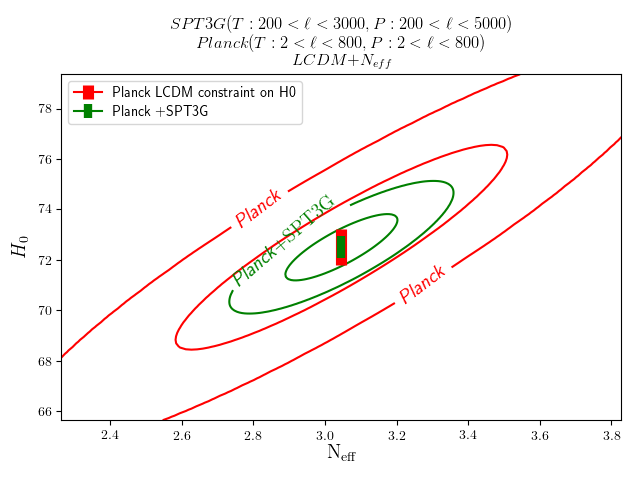

In [80]:
mean = [72.5,3.046]
sigmap = array([[inv(Fp_5000_h0_neff[0])[0,0],inv(Fp_5000_h0_neff[0])[0,2]],[inv(Fp_5000_h0_neff[0])[2,0],
                                                                    inv(Fp_5000_h0_neff[0])[2,2]]])

sigmaps_800 = array([[inv(Fps_800_5000_h0_neff)[0,0],inv(Fps_800_5000_h0_neff)[0,2]],
                     [inv(Fps_800_5000_h0_neff)[2,0],inv(Fps_800_5000_h0_neff)[2,2]]])

xlab = r'$\rm{N}_{\rm{eff}}$'
ylab = r'$H_0$'
titl='$SPT3G(T:200<\ell<3000,P:200<\ell<5000)$'+ \
'\n $Planck(T:2<\ell<800,P:2<\ell<800)$'+ \
'\n $LCDM$+$N_{eff}$'

matplotlib.rc('text', usetex = True)
figure()
cs2=sig_contours(mean,sigmap,colors = 'r')
cs3=sig_contours(mean,sigmaps_800,colors = 'g')

fmt2=dict(zip(cs2.levels,[r'$\textit{Planck}$',r'$\textit{Planck}$']))
fmt3=dict(zip(cs3.levels,[r'$\textit{Planck}$+$\rm{SPT3G}$',r'$\textit{Planck}$+$\rm{SPT3G}$']))


clabel(cs2,cs2.levels[::2], inline=True, fmt=fmt2,fontsize=14)
clabel(cs3,cs3.levels[::2], inline=True, fmt=fmt3, fontsize=14)
errorbar(mean[1],mean[0],yerr = sqrt(inv(Fp_5000_h0[0])[0,0]),color='r',elinewidth=8,label='Planck LCDM constraint on H0')
errorbar(mean[1],mean[0],yerr = sqrt(inv(Fps_800_5000_h0)[0,0]),color='g',elinewidth=6,label='Planck +SPT3G')

xlabel(xlab,fontsize=14)
ylabel(ylab,fontsize=14)
title(titl)
legend(loc='upper left')
tight_layout()
savefig('Figures/H0_Neff_constraints_planck_and_planck_800SPT3G.pdf')

<IPython.core.display.Javascript object>


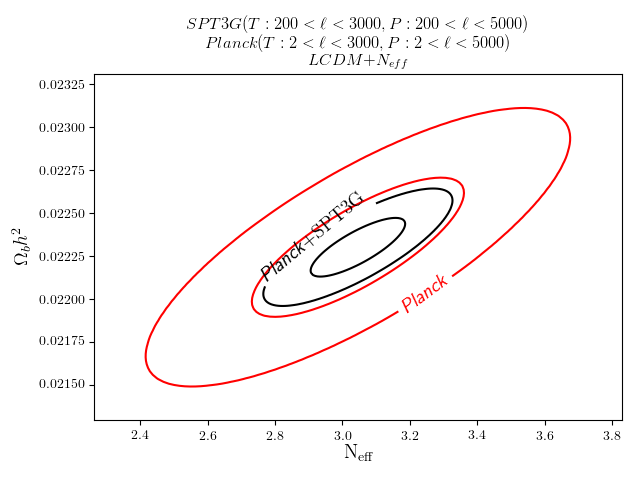

In [100]:
mean = [0.0223,3.046]
sigmap = array([[inv(Fp_5000_h0_neff[0])[4,4],inv(Fp_5000_h0_neff[0])[4,2]],[inv(Fp_5000_h0_neff[0])[2,4],
                                                                    inv(Fp_5000_h0_neff[0])[2,2]]])
sigmaps = array([[inv(Fps_5000_h0_neff)[4,4],inv(Fps_5000_h0_neff)[4,2]],[inv(Fps_5000_h0_neff)[2,4],
                                                                inv(Fps_5000_h0_neff)[2,2]]])


xlab = r'$\rm{N}_{\rm{eff}}$'
ylab = r'$\Omega_bh^2$'
titl='$SPT3G(T:200<\ell<3000,P:200<\ell<5000)$'+ \
'\n $Planck(T:2<\ell<3000,P:2<\ell<5000)$'+ \
'\n $LCDM$+$N_{eff}$'

matplotlib.rc('text', usetex = True)
figure()
cs2=sig_contours(mean,sigmap,colors = 'r')
cs1=sig_contours(mean,sigmaps,colors = 'k')

fmt1=dict(zip(cs1.levels,[r'$\textit{Planck}$+$\rm{SPT3G}$',r'$\textit{Planck}$+$\rm{SPT3G}$']))
fmt2=dict(zip(cs2.levels,[r'$\textit{Planck}$',r'$\textit{Planck}$']))


clabel(cs2,cs2.levels[::2], inline=True, fmt=fmt2,fontsize=14)
clabel(cs1,cs1.levels[::2], inline=True, fmt=fmt1,fontsize=14)

xlabel(xlab,fontsize=14)
ylabel(ylab,fontsize=14)
title(titl)
tight_layout()
savefig('Figures/omegabh2_Neff_constraints_planck_and_planckSPT3G.pdf')

<IPython.core.display.Javascript object>


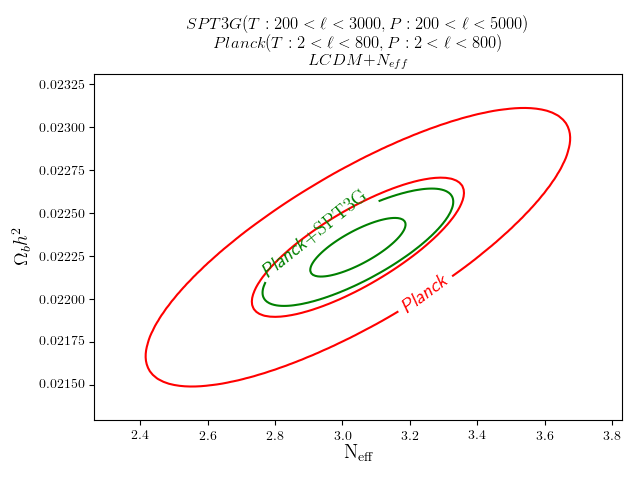

In [101]:
mean = [0.0223,3.046]
sigmap = array([[inv(Fp_5000_h0_neff[0])[4,4],inv(Fp_5000_h0_neff[0])[4,2]],[inv(Fp_5000_h0_neff[0])[2,4],
                                                                    inv(Fp_5000_h0_neff[0])[2,2]]])

sigmaps_800 = array([[inv(Fps_800_5000_h0_neff)[4,4],inv(Fps_800_5000_h0_neff)[4,2]],
                     [inv(Fps_800_5000_h0_neff)[2,4],inv(Fps_800_5000_h0_neff)[2,2]]])

xlab = r'$\rm{N}_{\rm{eff}}$'
ylab = r'$\Omega_bh^2$'
titl='$SPT3G(T:200<\ell<3000,P:200<\ell<5000)$'+ \
'\n $Planck(T:2<\ell<800,P:2<\ell<800)$'+ \
'\n $LCDM$+$N_{eff}$'

matplotlib.rc('text', usetex = True)
figure()
cs2=sig_contours(mean,sigmap,colors = 'r')
cs3=sig_contours(mean,sigmaps_800,colors = 'g')

fmt2=dict(zip(cs2.levels,[r'$\textit{Planck}$',r'$\textit{Planck}$']))
fmt3=dict(zip(cs3.levels,[r'$\textit{Planck}$+$\rm{SPT3G}$',r'$\textit{Planck}$+$\rm{SPT3G}$']))


clabel(cs2,cs2.levels[::2], inline=True, fmt=fmt2,fontsize=14)
clabel(cs3,cs3.levels[::2], inline=True, fmt=fmt3, fontsize=14)

xlabel(xlab,fontsize=14)
ylabel(ylab,fontsize=14)
title(titl)
tight_layout()
savefig('Figures/omegabh2_Neff_constraints_planck_and_planck_800SPT3G.pdf')

<IPython.core.display.Javascript object>


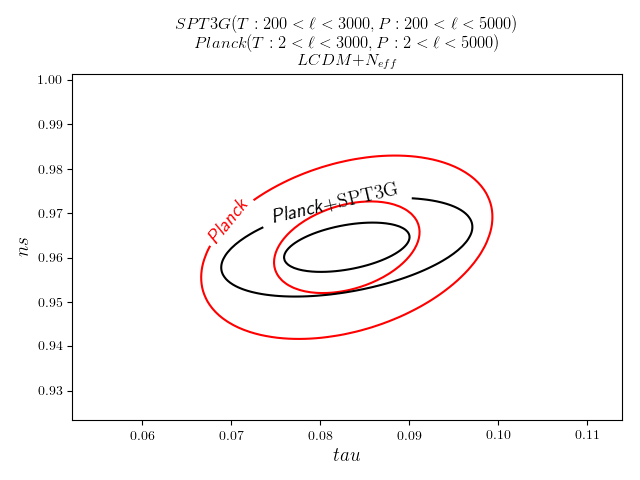

In [94]:
mean = [0.96233,0.083]
sigmap = array([[inv(Fp_5000_h0_neff[0])[3,3],inv(Fp_5000_h0_neff[0])[3,6]],[inv(Fp_5000_h0_neff[0])[6,3],
                                                                    inv(Fp_5000_h0_neff[0])[6,6]]])
sigmaps = array([[inv(Fps_5000_h0_neff)[3,3],inv(Fps_5000_h0_neff)[3,6]],[inv(Fps_5000_h0_neff)[6,3],
                                                                inv(Fps_5000_h0_neff)[6,6]]])


xlab = r'$tau$'
ylab = r'$ns$'
titl='$SPT3G(T:200<\ell<3000,P:200<\ell<5000)$'+ \
'\n $Planck(T:2<\ell<3000,P:2<\ell<5000)$'+ \
'\n $LCDM$+$N_{eff}$'

matplotlib.rc('text', usetex = True)
figure()
cs2=sig_contours(mean,sigmap,colors = 'r')
cs1=sig_contours(mean,sigmaps,colors = 'k')

fmt1=dict(zip(cs1.levels,[r'$\textit{Planck}$+$\rm{SPT3G}$',r'$\textit{Planck}$+$\rm{SPT3G}$']))
fmt2=dict(zip(cs2.levels,[r'$\textit{Planck}$',r'$\textit{Planck}$']))


clabel(cs2,cs2.levels[::2], inline=True, fmt=fmt2,fontsize=14)
clabel(cs1,cs1.levels[::2], inline=True, fmt=fmt1,fontsize=14)

xlabel(xlab,fontsize=14)
ylabel(ylab,fontsize=14)
title(titl)
tight_layout()
#savefig('Figures/omegabh2_Neff_constraints_planck_and_planckSPT3G.pdf')

<IPython.core.display.Javascript object>


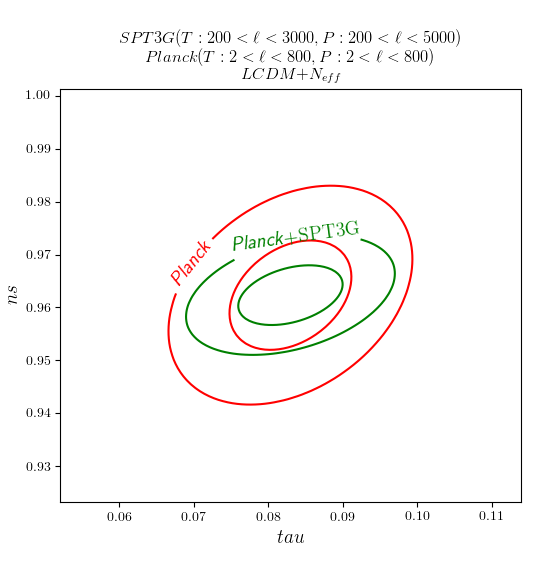

In [95]:
mean = [0.96233,0.083]
sigmap = array([[inv(Fp_5000_h0_neff[0])[3,3],inv(Fp_5000_h0_neff[0])[3,6]],[inv(Fp_5000_h0_neff[0])[6,3],
                                                                    inv(Fp_5000_h0_neff[0])[6,6]]])

sigmaps_800 = array([[inv(Fps_800_5000_h0_neff)[3,3],inv(Fps_800_5000_h0_neff)[3,6]],
                     [inv(Fps_800_5000_h0_neff)[6,4],inv(Fps_800_5000_h0_neff)[6,6]]])

xlab = r'$tau$'
ylab = r'$ns$'
titl='$SPT3G(T:200<\ell<3000,P:200<\ell<5000)$'+ \
'\n $Planck(T:2<\ell<800,P:2<\ell<800)$'+ \
'\n $LCDM$+$N_{eff}$'

matplotlib.rc('text', usetex = True)
figure()
cs2=sig_contours(mean,sigmap,colors = 'r')
cs3=sig_contours(mean,sigmaps_800,colors = 'g')

fmt2=dict(zip(cs2.levels,[r'$\textit{Planck}$',r'$\textit{Planck}$']))
fmt3=dict(zip(cs3.levels,[r'$\textit{Planck}$+$\rm{SPT3G}$',r'$\textit{Planck}$+$\rm{SPT3G}$']))


clabel(cs2,cs2.levels[::2], inline=True, fmt=fmt2,fontsize=14)
clabel(cs3,cs3.levels[::2], inline=True, fmt=fmt3, fontsize=14)

xlabel(xlab,fontsize=14)
ylabel(ylab,fontsize=14)
title(titl)
tight_layout()
#savefig('Figures/omegabh2_Neff_constraints_planck_and_planck_800SPT3G.pdf')